## ROC Curve Plotting

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = {
    "truth" : [],
    "prediction" : []
}

df = pd.DataFrame(data)

can_G = pd.read_csv("C:\\Users\\NirLavi\\Desktop\\PhD\\Lab\\IL LAB\\O6Meg\\data\\exp2_randomers\\ROC-AUC\\G-Trained\\can_validate_G_full_results.tsv", sep = '\t')
mod_G = pd.read_csv("C:\\Users\\NirLavi\\Desktop\\PhD\\Lab\\IL LAB\\O6Meg\\data\\exp2_randomers\\ROC-AUC\\G-Trained\\mod_validate_G_full_results.tsv", sep = '\t')

can_A = pd.read_csv("C:\\Users\\NirLavi\\Desktop\\PhD\\Lab\\IL LAB\\O6Meg\\data\\exp2_randomers\\ROC-AUC\\A-Trained\\can_validate_A_full_results.tsv", sep = '\t')
mod_A = pd.read_csv("C:\\Users\\NirLavi\\Desktop\\PhD\\Lab\\IL LAB\\O6Meg\\data\\exp2_randomers\\ROC-AUC\\A-Trained\\mod_validate_A_full_results.tsv", sep = '\t')

mod_G

,query_name,query_pos,ref_name,ref_pos,strand,gt_mod_idx,mod_probs,ref_align,query_align,within_align,within_gt
0,6bb53eeb-2f9b-4dd7-84fe-ada453c73281,1,seq_65055,NaN,+,NaN,"0.998046875,0.001953125",-----------,-----GTCTAG,False,False
1,6bb53eeb-2f9b-4dd7-84fe-ada453c73281,6,seq_65055,NaN,+,NaN,"0.994140625,0.005859375",-----------,GTCTAGTCTTC,False,False
2,6bb53eeb-2f9b-4dd7-84fe-ada453c73281,12,seq_65055,NaN,+,NaN,"0.998046875,0.001953125",-----------,TCTTCGCGTAC,False,False
3,6bb53eeb-2f9b-4dd7-84fe-ada453c73281,14,seq_65055,NaN,+,NaN,"0.998046875,0.001953125",-----------,TTCGCGTACGT,False,False
4,6bb53eeb-2f9b-4dd7-84fe-ada453c73281,18,seq_65055,NaN,+,NaN,"0.998046875,0.001953125",-----------,CGTACGTATTG,False,False
...,...,...,...,...,...,...,...,...,...,...,...
34029,ed31f9c9-1af1-4634-bdc2-51978811ac0d,236,seq_64703,NaN,+,NaN,"0.998046875,0.001953125",-----------,CAAGTGGAACC,False,False
34030,ed31f9c9-1af1-4634-bdc2-51978811ac0d,237,seq_64703,NaN,+,NaN,"0.998046875,0.001953125",-----------,AAGTGGAACCT,False,False
34031,ed31f9c9-1af1-4634-bdc2-51978811ac0d,247,seq_64703,NaN,+,NaN,"0.998046875,0.001953125",-----------,TCTCTGACAAG,False,False
34032,ed31f9c9-1af1-4634-bdc2-51978811ac0d,252,seq_64703,NaN,+,NaN,"0.998046875,0.001953125",-----------,GACAAGCAATA,False,False


In [4]:
#editting can_G and can_A
sub_can_G = can_G[["ref_pos", "strand", "mod_probs"]] #choosing the relevant column from the validate file
sub_can_G = sub_can_G[sub_can_G["strand"] == "+"]
sub_can_G = sub_can_G.dropna()

sub_can_A = can_A[["ref_pos", "strand", "mod_probs"]] #choosing the relevant column from the validate file
sub_can_A = sub_can_A[sub_can_A["strand"] == "+"]
sub_can_A = sub_can_A.dropna()
sub_can_G

,ref_pos,strand,mod_probs
11,8.0,+,"0.998046875,0.001953125"
12,9.0,+,"0.998046875,0.001953125"
13,13.0,+,"0.998046875,0.001953125"
14,17.0,+,"0.998046875,0.001953125"
15,19.0,+,"0.998046875,0.001953125"
...,...,...,...
21647,69.0,+,"0.998046875,0.001953125"
21648,70.0,+,"0.998046875,0.001953125"
21649,74.0,+,"0.990234375,0.009765625"
21650,76.0,+,"0.951171875,0.048828125"


In [6]:
can_mod_probs_G = sub_can_G["mod_probs"]
can_mod_probs_G = can_mod_probs_G[:].str.split(",", expand = True)

can_mod_probs_A = sub_can_A["mod_probs"]
can_mod_probs_A = can_mod_probs_A[:].str.split(",", expand = True)

can_mod_probs_A

,0,1
10,0.998046875,0.001953125
11,0.998046875,0.001953125
12,0.998046875,0.001953125
13,0.998046875,0.001953125
14,0.998046875,0.001953125
...,...,...
22264,0.990234375,0.009765625
22265,0.955078125,0.044921875
22266,0.994140625,0.005859375
22267,0.978515625,0.021484375


In [8]:
can_mod_probs_G = can_mod_probs_G[1] #the probabilities of being modified
can_mod_probs_A = can_mod_probs_A[1]
can_mod_probs_A

10       0.001953125
11       0.001953125
12       0.001953125
13       0.001953125
14       0.001953125
            ...     
22264    0.009765625
22265    0.044921875
22266    0.005859375
22267    0.021484375
22268    0.029296875
Name: 1, Length: 7481, dtype: object

In [10]:
sub_can_G.insert(0,"truth",0)
sub_can_G.insert(1,"prediction",can_mod_probs_G)

sub_can_A.insert(0,"truth",0)
sub_can_A.insert(1,"prediction",can_mod_probs_A)

sub_can_A

,truth,prediction,ref_pos,strand,mod_probs
10,0,0.001953125,2.0,+,"0.998046875,0.001953125"
11,0,0.001953125,4.0,+,"0.998046875,0.001953125"
12,0,0.001953125,7.0,+,"0.998046875,0.001953125"
13,0,0.001953125,10.0,+,"0.998046875,0.001953125"
14,0,0.001953125,11.0,+,"0.998046875,0.001953125"
...,...,...,...,...,...
22264,0,0.009765625,54.0,+,"0.990234375,0.009765625"
22265,0,0.044921875,60.0,+,"0.955078125,0.044921875"
22266,0,0.005859375,72.0,+,"0.994140625,0.005859375"
22267,0,0.021484375,73.0,+,"0.978515625,0.021484375"


In [12]:
#editting mod_G - it will be split into modified and un-mod
sub_mod_G = mod_G[["ref_pos", "strand", "mod_probs"]]
sub_mod_G = sub_mod_G[sub_mod_G["strand"] == "+"]
sub_mod_G = sub_mod_G.dropna()

sub_mod_A = mod_A[["ref_pos", "strand", "mod_probs"]]
sub_mod_A = sub_mod_A[sub_mod_A["strand"] == "+"]
sub_mod_A = sub_mod_A.dropna()

sub_mod_G

,ref_pos,strand,mod_probs
49,2.0,+,"0.998046875,0.001953125"
50,4.0,+,"0.998046875,0.001953125"
51,16.0,+,"0.998046875,0.001953125"
52,18.0,+,"0.998046875,0.001953125"
53,19.0,+,"0.998046875,0.001953125"
...,...,...,...
33987,26.0,+,"0.974609375,0.025390625"
33988,27.0,+,"0.978515625,0.021484375"
33989,29.0,+,"0.998046875,0.001953125"
33990,36.0,+,"0.998046875,0.001953125"


In [14]:
mod_mod_probs_G = sub_mod_G["mod_probs"]
mod_mod_probs_G = mod_mod_probs_G[:].str.split(",", expand = True)

mod_mod_probs_A = sub_mod_A["mod_probs"]
mod_mod_probs_A = mod_mod_probs_A[:].str.split(",", expand = True)

mod_mod_probs_G

,0,1
49,0.998046875,0.001953125
50,0.998046875,0.001953125
51,0.998046875,0.001953125
52,0.998046875,0.001953125
53,0.998046875,0.001953125
...,...,...
33987,0.974609375,0.025390625
33988,0.978515625,0.021484375
33989,0.998046875,0.001953125
33990,0.998046875,0.001953125


In [16]:
mod_mod_probs_G = mod_mod_probs_G[1] #the probabilities of being modified
mod_mod_probs_A = mod_mod_probs_A[1]
mod_mod_probs_G

49       0.001953125
50       0.001953125
51       0.001953125
52       0.001953125
53       0.001953125
            ...     
33987    0.025390625
33988    0.021484375
33989    0.001953125
33990    0.001953125
33991    0.001953125
Name: 1, Length: 5965, dtype: object

In [18]:
sub_mod_G.insert(0,"prediction",mod_mod_probs_G)
sub_mod_A.insert(0,"prediction",mod_mod_probs_A)

sub_mod_G

,prediction,ref_pos,strand,mod_probs
49,0.001953125,2.0,+,"0.998046875,0.001953125"
50,0.001953125,4.0,+,"0.998046875,0.001953125"
51,0.001953125,16.0,+,"0.998046875,0.001953125"
52,0.001953125,18.0,+,"0.998046875,0.001953125"
53,0.001953125,19.0,+,"0.998046875,0.001953125"
...,...,...,...,...
33987,0.025390625,26.0,+,"0.974609375,0.025390625"
33988,0.021484375,27.0,+,"0.978515625,0.021484375"
33989,0.001953125,29.0,+,"0.998046875,0.001953125"
33990,0.001953125,36.0,+,"0.998046875,0.001953125"


In [20]:
sub_mod_modified_G = sub_mod_G[sub_mod_G["ref_pos"] == 21]
sub_mod_modified_G.insert(0,"truth",1)

sub_mod_modified_A = sub_mod_A[sub_mod_A["ref_pos"] == 21]
sub_mod_modified_A.insert(0,"truth",1)

sub_mod_modified_A

,truth,prediction,ref_pos,strand,mod_probs
62,1,0.994140625,21.0,+,"0.005859375,0.994140625"
116,1,0.990234375,21.0,+,"0.009765625,0.990234375"
231,1,0.982421875,21.0,+,"0.017578125,0.982421875"
309,1,0.986328125,21.0,+,"0.013671875,0.986328125"
382,1,0.990234375,21.0,+,"0.009765625,0.990234375"
...,...,...,...,...,...
27954,1,0.009765625,21.0,+,"0.990234375,0.009765625"
28056,1,0.998046875,21.0,+,"0.001953125,0.998046875"
28095,1,0.994140625,21.0,+,"0.005859375,0.994140625"
28340,1,0.998046875,21.0,+,"0.001953125,0.998046875"


In [22]:
sub_mod_non_modified_G = sub_mod_G[sub_mod_G["ref_pos"] != 21]
sub_mod_non_modified_G.insert(0,"truth",0)

sub_mod_non_modified_A = sub_mod_A[sub_mod_A["ref_pos"] != 21]
sub_mod_non_modified_A.insert(0,"truth",0)

sub_mod_non_modified_G

,truth,prediction,ref_pos,strand,mod_probs
49,0,0.001953125,2.0,+,"0.998046875,0.001953125"
50,0,0.001953125,4.0,+,"0.998046875,0.001953125"
51,0,0.001953125,16.0,+,"0.998046875,0.001953125"
52,0,0.001953125,18.0,+,"0.998046875,0.001953125"
53,0,0.001953125,19.0,+,"0.998046875,0.001953125"
...,...,...,...,...,...
33987,0,0.025390625,26.0,+,"0.974609375,0.025390625"
33988,0,0.021484375,27.0,+,"0.978515625,0.021484375"
33989,0,0.001953125,29.0,+,"0.998046875,0.001953125"
33990,0,0.001953125,36.0,+,"0.998046875,0.001953125"


In [24]:
sub_can_G = sub_can_G[["truth", "prediction"]]
sub_can_A = sub_can_A[["truth", "prediction"]]

sub_can_G

,truth,prediction
11,0,0.001953125
12,0,0.001953125
13,0,0.001953125
14,0,0.001953125
15,0,0.001953125
...,...,...
21647,0,0.001953125
21648,0,0.001953125
21649,0,0.009765625
21650,0,0.048828125


In [26]:
sub_mod_non_modified_G = sub_mod_non_modified_G[["truth", "prediction"]]
sub_mod_non_modified_A = sub_mod_non_modified_A[["truth", "prediction"]]

sub_mod_non_modified_G

,truth,prediction
49,0,0.001953125
50,0,0.001953125
51,0,0.001953125
52,0,0.001953125
53,0,0.001953125
...,...,...
33987,0,0.025390625
33988,0,0.021484375
33989,0,0.001953125
33990,0,0.001953125


In [28]:
sub_mod_modified_G = sub_mod_modified_G[["truth", "prediction"]]
sub_mod_modified_A = sub_mod_modified_A[["truth", "prediction"]]

sub_mod_modified_A

,truth,prediction
62,1,0.994140625
116,1,0.990234375
231,1,0.982421875
309,1,0.986328125
382,1,0.990234375
...,...,...
27954,1,0.009765625
28056,1,0.998046875
28095,1,0.994140625
28340,1,0.998046875


In [30]:
#concatinating
df_G = pd.concat([sub_can_G, sub_mod_non_modified_G, sub_mod_modified_G])
df_A = pd.concat([sub_can_A, sub_mod_non_modified_A, sub_mod_modified_A])
df_all = pd.concat([sub_can_G, sub_can_A, sub_mod_non_modified_G, sub_mod_non_modified_A, sub_mod_modified_G, sub_mod_modified_A])

df_all

,truth,prediction
11,0,0.001953125
12,0,0.001953125
13,0,0.001953125
14,0,0.001953125
15,0,0.001953125
...,...,...
27954,1,0.009765625
28056,1,0.998046875
28095,1,0.994140625
28340,1,0.998046875


In [32]:
from sklearn.metrics import roc_curve, auc
truth_G = np.array(df_G.iloc[:,0])
truth_A = np.array(df_A.iloc[:,0])
truth_all = np.array(df_all.iloc[:,0])

truth_G

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [34]:
prediction_G = np.array(df_G.iloc[:,1], dtype=float)
prediction_A = np.array(df_A.iloc[:,1], dtype=float)
prediction_all = np.array(df_all.iloc[:,1], dtype=float)

prediction_all

array([0.00195312, 0.00195312, 0.00195312, ..., 0.99414062, 0.99804688,
       0.99414062])

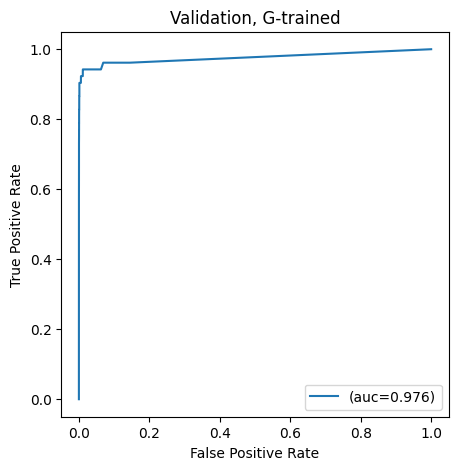

Optimal Threshold:  0.232
True Positive Rate:  0.942
False Positive Rate:  0.011


In [58]:
fpr_G, tpr_G, thresholds_G = roc_curve(truth_G, prediction_G)
auc_G = auc(fpr_G, tpr_G)

plt.figure(figsize=(5,5), dpi=100)
plt.plot(fpr_G, tpr_G, linestyle='-', label='(auc=%0.3f)' % auc_G)
plt.title('Validation, G-trained')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend(loc = 4)
plt.show()

print("Optimal Threshold: ", round(thresholds_G[np.argmax(tpr_G - fpr_G)],3))
print("True Positive Rate: ", round(tpr_G[np.argmax(tpr_G - fpr_G)],3))
print("False Positive Rate: ", round(fpr_G[np.argmax(tpr_G - fpr_G)],3))

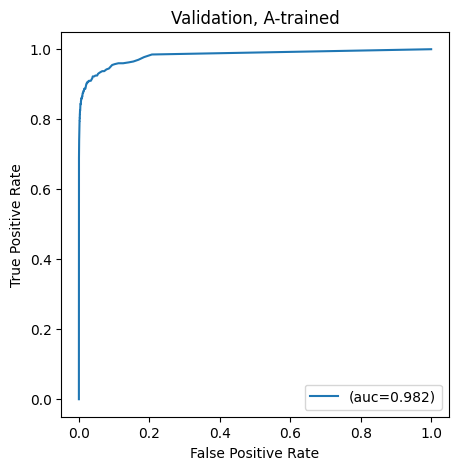

Optimal Threshold:  0.088
True Positive Rate:  0.922
False Positive Rate:  0.039


In [62]:
fpr_A, tpr_A, thresholds_A = roc_curve(truth_A, prediction_A)
auc_A = auc(fpr_A, tpr_A)

plt.figure(figsize=(5,5), dpi=100)
plt.plot(fpr_A, tpr_A, linestyle='-', label='(auc=%0.3f)' % auc_A)
plt.title('Validation, A-trained')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend(loc = 4)
plt.show()

print("Optimal Threshold: ", round(thresholds_A[np.argmax(tpr_A - fpr_A)],3))
print("True Positive Rate: ", round(tpr_A[np.argmax(tpr_A - fpr_A)],3))
print("False Positive Rate: ", round(fpr_A[np.argmax(tpr_A - fpr_A)],3))

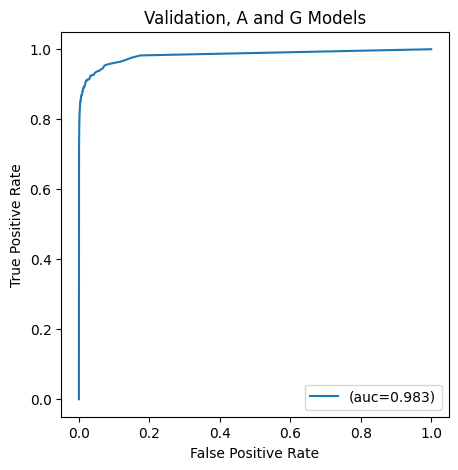

Optimal Threshold:  0.088
True Positive Rate:  0.925
False Positive Rate:  0.033


In [64]:
fpr_all, tpr_all, thresholds_all = roc_curve(truth_all, prediction_all)
auc_all = auc(fpr_all, tpr_all)

plt.figure(figsize=(5,5), dpi=100)
plt.plot(fpr_all, tpr_all, linestyle='-', label='(auc=%0.3f)' % auc_all)
plt.title('Validation, A and G Models')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend(loc = 4)
plt.show()

print("Optimal Threshold: ", round(thresholds_all[np.argmax(tpr_all - fpr_all)],3))
print("True Positive Rate: ", round(tpr_all[np.argmax(tpr_all - fpr_all)],3))
print("False Positive Rate: ", round(fpr_all[np.argmax(tpr_all - fpr_all)],3))